# Project 1: Edge & Feature Detector

Author: Hasan Khan

ID: hk4cd

Date: February 9th, 2017 

Description: An omplementation of the canny edge detector and Harris feature detector


------------------------------------------------------------------------------------------------------------------


# Loading Image

Loads image. From tutorial.

Populating the interactive namespace from numpy and matplotlib
(699, 1024, 3)
699
1024
(699, 1024)


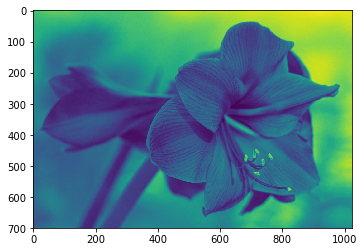

In [1]:
%pylab inline

import numpy as np, skimage, skimage.io, pylab, scipy.ndimage.filters, scipy, scipy.signal
import matplotlib.pyplot as plt

## CANNY EDGE DETECTOR ##########################################

## Reading input image 

R=skimage.io.imread('/Users/Hasan/Desktop/Workspace/Computer_Vision/inputFlower.jpg')
A=skimage.img_as_float(R) 

print A.shape 

lum = numpy.array([])
lum = np.zeros((A.shape[0], A.shape[1]))

print A.shape[0]
print A.shape[1]


print lum.shape

for i in range(0, 699):
    for j in range(0, 1024):
            lum[i][j] = (0.2126*(A[i][j][0])) + (0.7152*(A[i][j][1])) + (0.0722*(A[i][j][2]))

pylab.imshow(lum)


--------------------------------------------------------------------------------------------------------------

# Box and Gaussian filters

The cell below contains implementations of both box and Gaussian filters

In [3]:
### GAUSSIAN FILTER ###############################

G = numpy.ones((81,81))

sigma = 1

for u in range(-40,41):
    a = u+40
    
    for v in range(-40,41):        
        b = v+40
        G[a][b] = (1/(2*pi*sigma**2)) * (e**(-(u**2+v**2)/(2*sigma**2)))
        #print ('kernel vals: ', G[a][b])


kernSum = G.sum()

for a in range (81):
    for b in range (81):
        G[a][b] = G[a][b] / kernSum

print 'Gaussian applied w/ sigma = ', sigma, ": "

       
### smoothened image ##############################

print 'lum shape: ', lum.shape

B = scipy.signal.convolve2d(lum, G, mode = 'same') # convolving

#pylab.imshow(B, cmap='gray')

Gaussian applied w/ sigma =  1 : 
lum shape:  (699, 1024)


------------------------------------------------------------------------------------------------------------------

# Finding gradients


Dimensions:  (699, 1024)
shape of edge directions (699, 1024)
min edgeDirection:  5.91970749753e-07
max edgeDirection:  3.14159146109


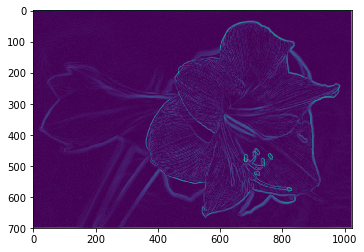

In [4]:

print 'Dimensions: ', B.shape

gradientArr = np.gradient(B)
xDrv = gradientArr[0]
yDrv = gradientArr[1]
       
edgeDirections = np.arctan2(yDrv, xDrv)
edgeStrengths = np.sqrt((xDrv**2)+(yDrv**2))

print 'shape of edge directions', edgeDirections.shape

for i in range(699):
    for j in range(1024):      
        if (edgeDirections[i][j] < 0):
            edgeDirections[i][j] = edgeDirections[i][j]+np.pi

print 'min edgeDirection: ', np.amin(edgeDirections)
print 'max edgeDirection: ', np.amax(edgeDirections)

pylab.imshow(edgeStrengths) 


----------------------------------------------------------------------------------------------------------------
# Edge Thinning

Thins the edges of the image

Horz:  180483
Vert:  141673
DiagA:  149793
DiagB:  164181
Pixels kept: 636130 . Total pixels:  715776.0
Pixels kept, ratio: 0.888727758405


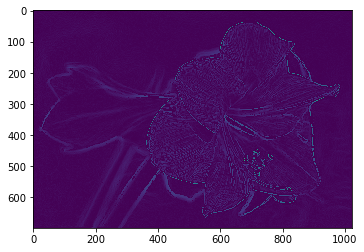

In [5]:
thinImage = numpy.zeros((698, 1023), dtype=float)

# radian bounds:
pi = np.pi
boundA = (pi/8.0)
boundB = (pi/4.0) + (pi/8.0)
boundC = (pi/2.0) + (pi/8.0) 
boundD = (pi - (pi/8.0))

horiz = 0
vert = 0
diagA = 0
diagB = 0

eps = 0.006 #epsilon value. calculates 

for i in range(698):
    for j in range(1023):
        
        # if horizontal direction edge:   
        if ((edgeDirections[i][j] > 0 and edgeDirections[i][j] < boundA) 
        or (edgeDirections[i][j] <= np.pi and edgeDirections[i][j] >= boundD)):  
            
            if ((edgeStrengths[i+1][j] > edgeStrengths[i][j]+eps) or (edgeStrengths[i-1][j] > edgeStrengths[i][j]+eps)):
                thinImage[i][j] = 0
            else:
                horiz+=1
                thinImage[i][j] = edgeStrengths[i][j]
                 
        # if vertical direction edge:  
        if (edgeDirections[i][j] > boundB and edgeDirections[i][j] < boundC):           
            
            if ((edgeStrengths[i][j+1] > edgeStrengths[i][j]+eps) or (edgeStrengths[i][j-1] > edgeStrengths[i][j]+eps)):
                thinImage[i][j] = 0
            else:
                vert+=1
                thinImage[i][j] =edgeStrengths[i][j]
           
       
        # if diag 1 direction edge: 
        if (edgeDirections[i][j] > boundA and edgeDirections[i][j] < boundB): 
                          
            if ((edgeStrengths[i+1][j+1] > edgeStrengths[i][j]+eps) or (edgeStrengths[i-1][j-1] > edgeStrengths[i][j]+eps)):
                thinImage[i][j] = 0
            else:
                diagB+=1
                thinImage[i][j] = edgeStrengths[i][j]
        
         
        # if diag 2 direction edge: 
        if ( edgeDirections[i][j] > boundC and edgeDirections[i][j] < boundD):
            
            if ((edgeStrengths[i+1][j-1] > edgeStrengths[i][j]+eps) or (edgeStrengths[i-1][j+1] > edgeStrengths[i][j]+eps)):
                thinImage[i][j] = 0
            else:
                diagA+=1
                thinImage[i][j] = edgeStrengths[i][j]
                     
#print 'Pixels kept ratio: ', (kept / ((699*1024)-kept))
print 'Horz: ', horiz
print 'Vert: ', vert
print 'DiagA: ', diagA
print 'DiagB: ', diagB

print 'Pixels kept:', (horiz+vert+diagA+diagB), '. Total pixels: ', 1024.0*699.0
print 'Pixels kept, ratio:', np.float(((horiz+vert+diagA+diagB)/(1024.0*699.0)))
        
pylab.imshow(thinImage) 

# Hysterisis Thresholding 


In [6]:
import sys

sys.setrecursionlimit(715776)

def hysterisis(newMarked):    

    while (not strongQ.empty() and strongQ.qsize() !=0):
        
        r, c =  strongQ.get()
        #print ' '
        #print 'getting next r & c coordinates: ', r, c
     
       
        if ( c < 1024 and r < 699):
            #print 'Coordinates within range '
            
            if markedPixels[r+1][c] == 1:
                #print 'Right pixel is strong. Current newMarked', newMarked
                markedPixels[r+1][c] = 2
                strongQ.put((r+1,c))
                newMarked+=1
                hysterisis(newMarked)
                 
            if markedPixels[r+1][c+1] == 1:
                newMarked+=1
                #print 'Right-up pixel is strong. Current newMarked', newMarked
                markedPixels[r+1][c+1] = 2
                strongQ.put((r+1,c+1))
                hysterisis(newMarked)
                
            if markedPixels[r][c+1] == 1:
                newMarked+=1
                #print 'Up pixel is strong. Current newMarked', newMarked
                markedPixels[r][c+1] = 2
                strongQ.put((r,c+1))
                hysterisis(newMarked)

            if markedPixels[r-1][c] == 1:
                newMarked+=1
                #print 'Left pixel is strong. Current newMarked', newMarked
                markedPixels[r-1][c] = 2
                strongQ.put((r-1,c))
                hysterisis(newMarked)
                
            if markedPixels[r][c-1] == 1:
                newMarked+=1
                #print 'Down pixel is strong. Current newMarked', newMarked
                markedPixels[r][c-1] = 2
                strongQ.put((r,c-1))
                hysterisis(newMarked)
                
            if markedPixels[r-1][c-1] == 1:
                newMarked+=1
                #print 'Down-left pixel is strong. Current newMarked', newMarked
                markedPixels[r-1][c-1] = 2
                strongQ.put((r-1,c-1))
                hysterisis(newMarked)
            else:
                #print 'Nothing is strong. Current newMarked', newMarked
                hysterisis(newMarked)
    
        #print 'Queue is empty.'
        break
    #print 'Out of loop!' 
    return 0
                     

max:  0.224357571333
Entering hysterisis: 


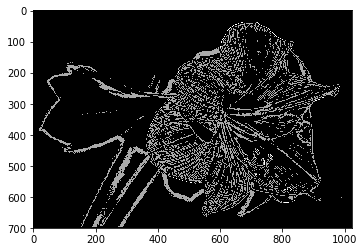

In [10]:
import Queue
import sys

sys.setrecursionlimit(715776)

strongQ = Queue.Queue()

minThreshold = .012
maxThreshold = .09

markedPixels = numpy.zeros((699, 1024))
edgeOrNo = numpy.zeros((699, 1024))

#for i in range(698):
#    for j in range(1023):
#        print thinImage[i][j]
        
print 'max: ', np.amax(thinImage)


for i in range(698):
    for j in range(1023):
        if (thinImage[i][j] < minThreshold):
            markedPixels[i][j] = 0  # weak edge
        
        if ((thinImage[i][j] > minThreshold) and (thinImage[i][j] < maxThreshold)):
            markedPixels[i][j] = 1 # candidate edge
        
        if (thinImage[i][j] > maxThreshold):
            #print 'strong edge detect!'
            markedPixels[i][j] = 3 # strong edge
            strongQ.put((i,j)) # putting strong edge coordinates into queue
 
print 'Entering hysterisis: '
newMarked = 0
hysterisis(newMarked)

#'''
for i in range(4,695):
    for j in range(4,1020):
        if (markedPixels[i][j] == 1): markedPixels[i][j] = 2 
#'''

pylab.imshow(markedPixels, cmap = 'gray')        

# Corner Detection


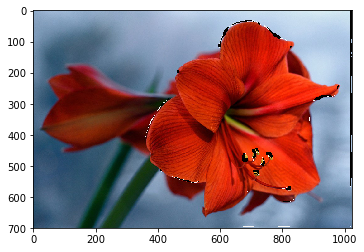

In [17]:

from PIL import Image

C = np.zeros((699, 1024))
m=4
#eThresh = 0.0000009
eThresh = 0.0002
cornerArr = np.zeros((698, 1023))

for i in range(4,695):
    for j in range(4,1020):
        
        #print 'You are in pixel: ', i, j
        
        for a in range (-3,4):
            for b in range (-3,4):  
                
                xDrvSum = xDrv[i+a][j+b]**2
                yDrvSum = yDrv[i+a][j+b]**2

        
        fxYx = (xDrvSum*yDrvSum)
        
        alpha = 1.0/(9.0**2.0)
        
        cov = [[xDrvSum, fxYx], [fxYx, yDrvSum]] 
        
        C = np.multiply(alpha, cov)
    
        #print 'C val: ', C
        
        e, v = numpy.linalg.eig(C)
        
        #print 'e vals ', e  
        
        eVal = np.average(e)
        
        #print 'average e val: ', eVal
        
        if (eVal > eThresh):
            #print 'made it'
            cornerArr[i][j] = 1
        


for i in range(1,695):
    for j in range(1,1020):
        if (cornerArr[i][j] ==1):    
            for a in range (-3, 4):
                for b in range (-3, 4):
                    A[i+a][j+b] = -1

pylab.imshow(A)
